In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords

In [2]:
text_data = pd.read_csv('./yelp.csv')

In [7]:
text_data.shape

(10000, 10)

In [8]:
%pprint
text_data.text.head()

Pretty printing has been turned ON


0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    love the gyro plate. Rice is so good and I als...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
Name: text, dtype: object

In [9]:
text_data['text_len']=text_data['text'].apply(len)

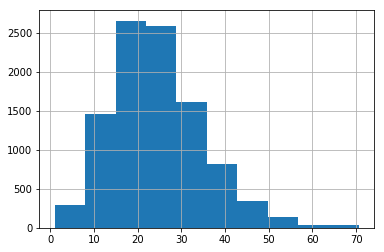

In [10]:
%matplotlib inline 
text_data['text_len'].apply(np.sqrt).hist()

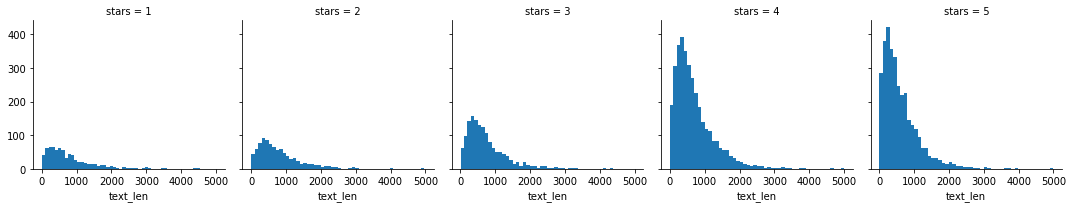

In [11]:
g = sns.FacetGrid(data=text_data, col='stars')
g.map(plt.hist, 'text_len', bins=50)

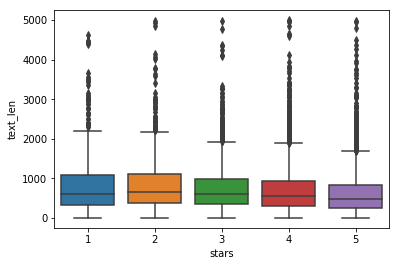

In [12]:
sns.boxplot(x='stars', y='text_len', data=text_data)


In [13]:
text_data.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'text_len'],
      dtype='object')

In [14]:
text_data[['cool', 'useful', 'funny', 'text_len']].corr()

,cool,useful,funny,text_len
cool,1.000000,0.887102,0.764342,0.241451
useful,0.887102,1.000000,0.723406,0.293975
funny,0.764342,0.723406,1.000000,0.251760
text_len,0.241451,0.293975,0.251760,1.000000


In [15]:
star_group_data = text_data.groupby('stars').mean()
star_group_data.corr()

,cool,useful,funny,text_len
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_len,-0.857664,0.699881,0.843461,1.000000


In [16]:
st_words=stopwords.words('english')

In [17]:
st_words.remove('not')   

In [18]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return ' '.join([word for word in nopunc.split() if word.lower() not in st_words and not(word.isdigit())])

In [19]:
sample_text = "Hey there! 2222 This is a sample review, 22 33 which happens to 88 contain punctuations."
print(text_process(sample_text))

Hey sample review happens contain punctuations


In [20]:
yelp_data=text_data[(text_data.stars==1) | (text_data.stars==5)]


In [21]:
yelp_data.text=yelp_data.text.apply(text_process)

C:\Users\uesr\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
X = yelp_data['text']
y = yelp_data['stars']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(X)
X = bow_transformer.transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (4086, 21470)
Amount of Non-Zero occurrences:  217254
Density: 0.24764945383614195


In [29]:
preds = nb.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[167  61]
 [ 27 971]]


              precision    recall  f1-score   support

           1       0.86      0.73      0.79       228
           5       0.94      0.97      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.90      0.85      0.87      1226
weighted avg       0.93      0.93      0.93      1226



In [31]:
sum(y_test== preds)/len(y_test)

0.9282218597063622

In [37]:
yelp_data.stars.value_counts()

5    3337
1     749
Name: stars, dtype: int64

In [62]:
test_data=pd.read_csv('./Mrunali/sa_text.csv')
test_data.head()

,text,stars
0,I can't believe how spectacular my stay was at...,5
1,I love thrit books! I collect Stephen King boo...,5
2,Our family (3 generations) planned a week-long...,5
3,Local folks always willing to help and the ser...,5
4,The hotel was lovely inside. Was on a side roa...,5


In [63]:
test_data.stars.value_counts()

5    33
1    33
Name: stars, dtype: int64

In [64]:
X_test=bow_transformer.transform(test_data.text)

In [65]:
y_test_pred=nb.predict(X_test)

In [68]:

sum(test_data.stars== y_test_pred)/len(test_data.stars)

0.7878787878787878

In [32]:
another_negative_review ='completely dissatisfied with staff  however  impressing service'
another_negative_review

'completely dissatisfied with staff  however  impressing service'

In [33]:
another_negative_review_transformed = bow_transformer.transform([another_negative_review])
nb.predict(another_negative_review_transformed)[0]

1